In [1]:
import scipy.io.wavfile as wavio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
labels = pd.read_csv("./data/samples.csv")

recs = {}

for idx, row in labels.iterrows():
    if -1.65 < row.q_3 < -1.35:
        sr, data = wavio.read(f"data/{idx}.wav")
        if row.q_0 in recs:
            recs[row.q_0].append(data[16000:, 2])
        else:
            recs[row.q_0] = [data[16000:, 2]]

In [3]:
# aud = np.concat([samp[1][:1600] for samp in recs.values()])
# wavio.write("combinedaudio.wav", data=aud, rate=sr)

In [4]:
import librosa

spectras = []
for key, val in recs.items():
    specs = [np.average(np.abs(librosa.stft(audio/np.max(audio), n_fft=4096)), axis=1) for audio in val]
    spectras.append(np.average(np.array(specs), axis=0))
    print(key)

1.5292
1.4292
1.3292000000000004
1.2292000000000003
1.1292000000000002
1.0292
0.9292
0.8292000000000004
0.7292000000000003
0.6292000000000002
0.5292000000000001
0.4292
0.3292000000000001
0.2292
0.1292000000000002
0.0292000000000001
-0.0707999999999999
-0.1707999999999998
-0.2707999999999999
-0.3707999999999998
-0.4707999999999999
-0.5708
-0.6708
-0.7707999999999999
-0.8707999999999999
-0.9708
-1.0708
-1.1707999999999998
-1.2708
-1.3708
-1.4708
-1.5708


In [5]:
spectrum = np.hstack([spec[:,None] for spec in spectras[::-1]])

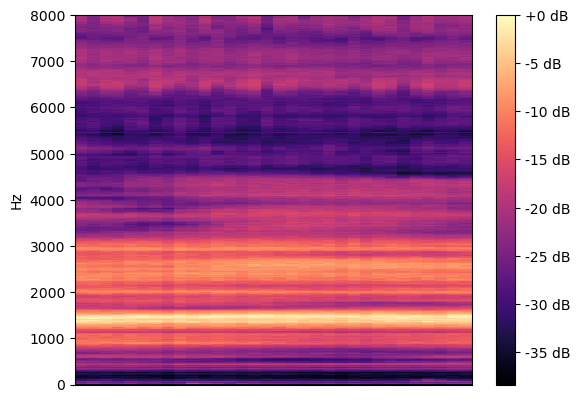

In [6]:
S_db = librosa.amplitude_to_db(spectrum, ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db[:1500,:], sr=sr, ax=ax, y_axis="hz")#, n_fft=8192) #y_axis="log", 
fig.colorbar(img, ax=ax, format="%+2.f dB")

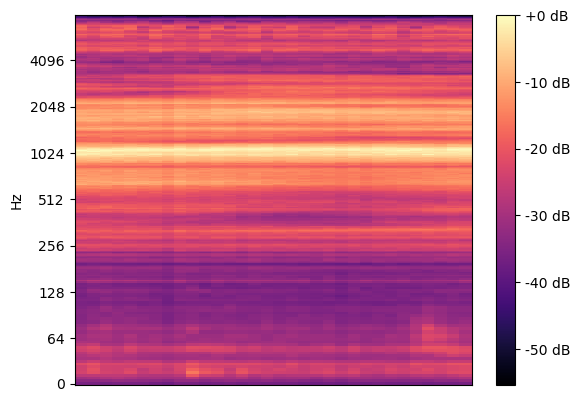

In [7]:
S_db = librosa.amplitude_to_db(spectrum, ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=sr, ax=ax, y_axis="log", n_fft=4096) #y_axis="log", 
fig.colorbar(img, ax=ax, format="%+2.f dB")

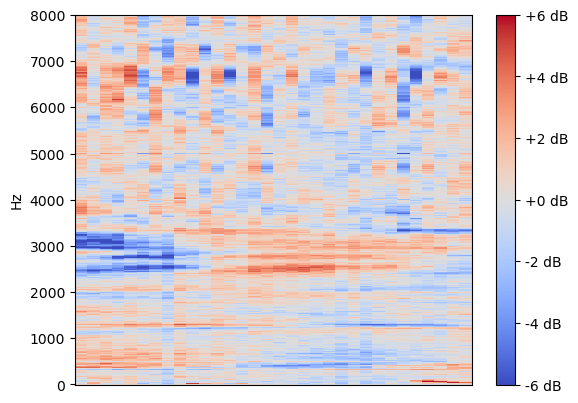

In [8]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db-np.mean(S_db, axis=1)[:,None], sr=sr, ax=ax, y_axis="hz", n_fft=4096, vmin=-6, vmax=6) #y_axis="log", 
fig.colorbar(img, ax=ax, format="%+2.f dB")
#img.set(cmap=cm.berlin)

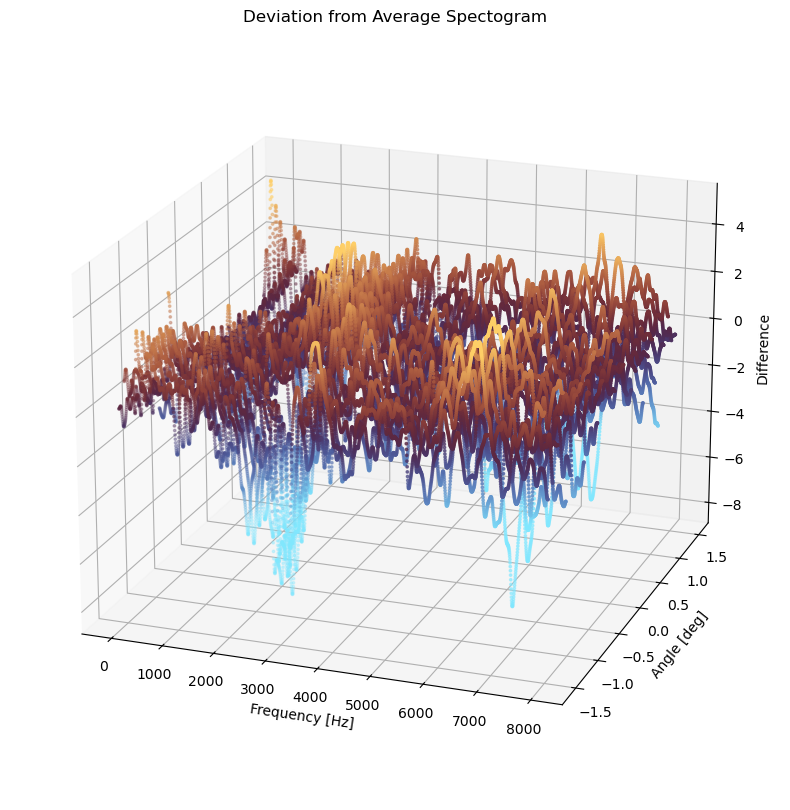

In [9]:
from scipy.ndimage import gaussian_filter1d
from cmcrameri import cm  # more colormaps, esp diverging w/black middle

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

avg = np.mean(S_db, axis=1)


for i, spec in enumerate(spectras):
    spectrum = gaussian_filter1d(S_db[:,i] - avg, 5)
    angle = -1.57 + i*0.1
    ax.scatter(np.linspace(0,8000,len(spectrum)), angle, spectrum, c=spectrum, s=3, vmin=-4, vmax=4, cmap=cm.managua_r)#, c=gaussian_filter1d(np.log(X[i, :])-np.log(avg), 7))

# Labels and title
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Angle [deg]')
ax.set_zlabel('Difference')
ax.set_title('Deviation from Average Spectogram')
ax.view_init(20,-70,0)


Text(0.5, 0.92, 'Deviation from Average Spectogram')

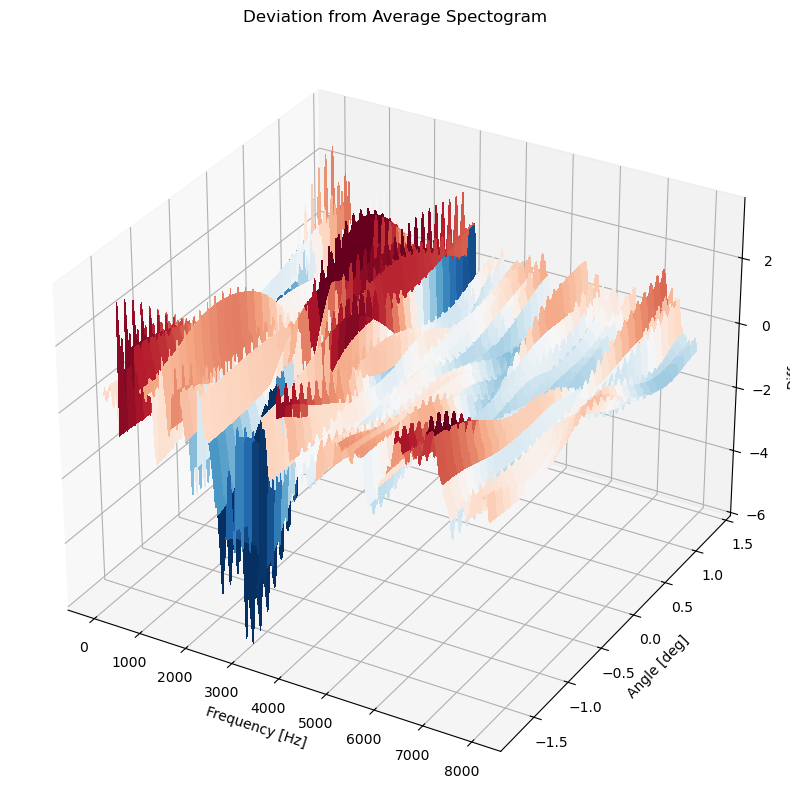

In [23]:
from scipy.ndimage import gaussian_filter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

avg = np.mean(S_db, axis=1)[:,None]

freq = np.linspace(0,8000,S_db.shape[0])
angle = np.arange(32)*0.1 - 1.75
x,y = np.meshgrid(freq, angle)

surf = ax.plot_surface(x,y, gaussian_filter((S_db- avg).T, sigma=3), cmap="RdBu_r",
                       linewidth=0, antialiased=False, vmin = -2, vmax=2)

ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Angle [deg]')
ax.set_zlabel('Difference')
ax.set_title('Deviation from Average Spectogram')